<a href="https://colab.research.google.com/github/yoavdana/ex1_DL/blob/main/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


Tensors
--------------------------------------------

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.




In [ ]:
import torch
import numpy as np

In [ ]:
data=[[1,1],[2,2]]
data_t=torch.Tensor(data)
print(f"from list : \n{data_t}\n")
data_np=np.array(data)
print(f"ndarry : \n{data_np}\n")
data_t=torch.from_numpy(data_np)
print(f"from numpy :\n {data_t}\n")
data_np=data_t.numpy()
print(f"numpy from torch :\n {data_np}\n")

from list : 
tensor([[1., 1.],
        [2., 2.]])

ndarry : 
[[1 1]
 [2 2]]

from numpy :
 tensor([[1, 1],
        [2, 2]])

numpy from torch :
 [[1 1]
 [2 2]]



With random or constant values:



In [ ]:
  shape = (3, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2203, 0.5690, 0.0219],
        [0.2636, 0.1434, 0.6258],
        [0.3912, 0.6640, 0.5681]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


# Tensor Attributes
~~~~~~~~~~~~~~~~~

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Tensor Operations
~~~~~~~~~~~~~~~~~

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
`here <https://pytorch.org/docs/stable/torch.html>`__.

Each of them can be run on the GPU (at typically higher speeds than on a
CPU).




In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")
  tensor=tensor.to('cpu')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0
Device tensor is stored on: cpu


In [ ]:
tensor = torch.ones(4, 4)#numpy like indexing and slicing
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)#tensor concatnate
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])



A Gentle Introduction to ``torch.autograd``
---------------------------------

``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training. In this section, you will get a conceptual
understanding of how autograd helps a neural network train.

Background
~~~~~~~~~~
Neural networks (NNs) are a collection of nested functions that are
executed on some input data. These functions are defined by *parameters*
(consisting of weights and biases), which in PyTorch are stored in
tensors.

Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess
about the correct output. It runs the input data through each of its
functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters
proportionate to the error in its guess. It does this by traversing
backwards from the output, collecting the derivatives of the error with
respect to the parameters of the functions (*gradients*), and optimizing
the parameters using gradient descent. For a more detailed walkthrough
of backprop, check out this `video from
3Blue1Brown <https://www.youtube.com/watch?v=tIeHLnjs5U8>`__.








In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)



```
`# This is formatted as code`
```

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}



In [ ]:
Q = 3*a**3 - b**2

Let's assume ``a`` and ``b`` to be parameters of an NN, and ``Q``
to be the error. In NN training, we want gradients of the error
w.r.t. parameters, i.e.

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}


When we call ``.backward()`` on ``Q``, autograd calculates these gradients
and stores them in the respective tensors' ``.grad`` attribute.

We need to explicitly pass a ``gradient`` argument in ``Q.backward()`` because it is a vector.
``gradient`` is a tensor of the same shape as ``Q``, and it represents the
gradient of Q w.r.t. itself, i.e.

\begin{align}\frac{dQ}{dQ} = 1\end{align}

Equivalently, we can also aggregate Q into a scalar and call backward implicitly, like ``Q.sum().backward()``.




In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

RuntimeError: ignored



Gradients are now deposited in ``a.grad`` and ``b.grad``



In [ ]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


# Computational Graph
~~~~~~~~~~~~~~~~~~~

Conceptually, autograd keeps a record of data (tensors) & all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of
`Function <https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function>`__
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor, and
- maintain the operation’s *gradient function* in the DAG.

The backward pass kicks off when ``.backward()`` is called on the DAG
root. ``autograd`` then:

- computes the gradients from each ``.grad_fn``,
- accumulates them in the respective tensor’s ``.grad`` attribute, and
- using the chain rule, propagates all the way to the leaf tensors.

Below is a visual representation of the DAG in our example. In the graph,
the arrows are in the direction of the forward pass. The nodes represent the backward functions
of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors ``a`` and ``b``.


<div class="alert alert-info"><h4>Note</h4><p>**DAGs are dynamic in PyTorch**
  An important thing to note is that the graph is recreated from scratch; after each
  ``.backward()`` call, autograd starts populating a new graph. This is
  exactly what allows you to use control flow statements in your model;
  you can change the shape, size and operations at every iteration if
  needed.</p></div>

Exclusion from the DAG
^^^^^^^^^^^^^^^^^^^^^^

``torch.autograd`` tracks operations on all tensors which have their
``requires_grad`` flag set to ``True``. For tensors that don’t require
gradients, setting this attribute to ``False`` excludes it from the
gradient computation DAG.

The output tensor of an operation will require gradients even if only a
single input tensor has ``requires_grad=True``.




In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In a NN, parameters that don't compute gradients are usually called frozen parameters. It is useful to "freeze" part of your model if you know in advance that you won't need the gradients of those parameters (this offers some performance benefits by reducing autograd computations).

Usage in PyTorch
~~~~~~~~~~~
Let's take a look at a single training step.
For this example, we load a pretrained resnet18 model from ``torchvision``.
We create a random data tensor to represent a single image with 3 channels, and height & width of 64,
and its corresponding ``label`` initialized to some random values.

In [ ]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

In [ ]:
prediction = model(data) # forward pass

In [ ]:
loss = (prediction - labels).sum()
model.zero_grad()
loss.backward() # backward pass


In [ ]:
print(model.conv1.weight.grad[0])

tensor([[[  45.3120,   15.8228,  -58.1659,   69.4594,  -57.9331,   77.4613,
           -61.2140],
         [   3.8643, -180.2598,   60.1043,  -16.3388, -164.0959,  -84.0769,
           103.9125],
         [  89.2597,  -18.2798,  -51.8966,  -70.8144,   -2.5904,   59.0292,
           177.9899],
         [ -54.5968, -118.0053,  -36.6554,   80.6524,  -33.8374,  -57.2233,
           142.7964],
         [ -77.6155,   45.6824,    0.9151,  -33.4612,    7.3208,   34.8999,
           114.4417],
         [-116.9106,   59.8694,  -33.4964,  119.6358,  117.9383,   53.8553,
           -15.8785],
         [  31.4262,  -17.6762,   25.2915,   48.6159,  -53.7559,   54.3460,
           -25.8746]],

        [[  62.2159,  -43.5392,    2.6019, -103.9111,   31.3935,   35.1284,
          -183.3113],
         [  -0.6093,  -57.0149,  -95.0539,   62.0091,  -90.5718,   28.0831,
           -26.8224],
         [ -40.3777,   -7.8368,  -62.4510,  -77.3496,   96.9610,   35.7758,
            49.4069],
         [ -57.544

Next, we load an optimizer, in this case SGD with a learning rate of 0.01 and momentum of 0.9.
We register all the parameters of the model in the optimizer.




In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Finally, we call ``.step()`` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in ``.grad``.




In [ ]:
optim.step() #gradient descent

Neural Networks Models
===============

Neural networks can be constructed using the ``torch.nn`` package.

Now that you had a glimpse of ``autograd``, ``nn`` depends on
``autograd`` to define models and differentiate them.
An ``nn.Module`` contains layers, and a method ``forward(input)`` that
returns the ``output``.


Define a Network 
----------------

There varias ways to define a network 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 4x4 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 4*4 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

netSeq = nn.Sequential(
      nn.Conv2d(1, 6, 5),
      nn.Conv2d(6, 16, 5),
        # an affine operation: y = Wx + b
      nn.Linear(16 * 4 * 4, 120),  # 4*4 from image dimension 
      nn.Linear(120, 84),
      nn.Linear(84, 10)
      )

net = Net()
print(net)
print("sequential Network")
print(netSeq)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
sequential Network
Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (2): Linear(in_features=256, out_features=120, bias=True)
  (3): Linear(in_features=120, out_features=84, bias=True)
  (4): Linear(in_features=84, out_features=10, bias=True)
)


*You* just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``



In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Let's try a random 28x28 input.
Note: expected input size of this net (LeNet) is 28x28. To use this net on
the MNIST dataset, please resize the images from the dataset to 28x28.



In [ ]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[ 0.1611,  0.0821, -0.2051, -0.0015,  0.1370,  0.0191,  0.1536, -0.0423,
         -0.0918,  0.0246]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random


gradients:



In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network

Loss Function
-------------
A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
`loss functions <https://pytorch.org/docs/nn.html#loss-functions>`_ under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the input and the target.

For example:

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6169, grad_fn=<MseLossBackward>)


Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> flatten -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the neural net parameters, and all Tensors in the graph that have
``requires_grad=True`` will have their ``.grad`` Tensor accumulated with the
gradient.

For illustration, let us follow a few steps backward:



# Backprop
--------
To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.



In [ ]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias)

conv1.bias.grad before backward
Parameter containing:
tensor([-0.0613, -0.0848,  0.0175,  0.1990, -0.0118, -0.0979],
       requires_grad=True)


RuntimeError: ignored

**The only thing left to learn is:**

  - Updating the weights of the network

Update the weights
------------------
The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

     ``weight = weight - learning_rate * gradient``

We can implement this using simple Python code:

.. code:: python

    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, we built a small package: ``torch.optim`` that
implements all these methods. Using it is very simple:


In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

A Full Training loop
------------------


In [ ]:
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
from time import time

%matplotlib inline


Loading MNIST

In [ ]:
Batch_size=64
transform= transforms.ToTensor()
train_dataset= torchvision.datasets.MNIST(root='.', train=True, transform=transform ,download=True )
test_dataset= torchvision.datasets.MNIST(root='.', transform=transform, train=False, download=True)
train_dataloader= torch.utils.data.DataLoader(dataset=train_dataset, batch_size=Batch_size,shuffle=True)
test_dataloader= torch.utils.data.DataLoader(dataset=test_dataset, batch_size=Batch_size,shuffle=True )


Let visualize the  dataset

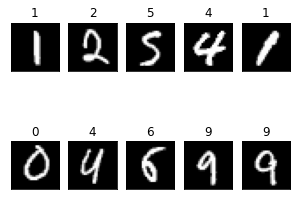

In [ ]:
dataiter=iter(train_dataloader)
images, labels= dataiter.next()
npimg= images.numpy()
fig = plt.figure(figsize=(5, 4))
for idx in np.arange(10):
    ax=fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
    ax.imshow(npimg[idx].reshape(28,28), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 5*5 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device='cpu'

net = Net().to(device)

criterion= nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(), lr=0.001)

train loop
------

In [ ]:
start_time=time()

for epoch in range(10):
    running_loss=0.0
    pbar=tqdm(iterable=train_dataloader)
    for i,batch in enumerate(pbar):
      batch=[item.to(device) for  item in batch]
      images, labels=batch
  
      # zero the parameter gradients
      optimizer.zero_grad()
      
      # forward 
      outputs= net(images)
      #calculate the loss between the target and the actuals
      loss= criterion(outputs, labels)
      #Gradient calculation uisng backward pass
      loss.backward()
      # update the weights
      optimizer.step()
      running_loss+=loss.item()
      pbar.set_postfix(loss=running_loss/(i+1))
    pbar.close()
    print('epoch %d -Loss %.3f' % (epoch +1,running_loss/(len(train_dataset)/Batch_size)))      
    running_loss = 0.0

print("Time for training using PyTorch %f" %(time()-start_time))

100%|██████████| 938/938 [00:17<00:00, 52.44it/s, loss=0.286]


epoch 1 -Loss 0.286


100%|██████████| 938/938 [00:17<00:00, 52.54it/s, loss=0.0871]


epoch 2 -Loss 0.087


100%|██████████| 938/938 [00:17<00:00, 52.54it/s, loss=0.0614]


epoch 3 -Loss 0.061


100%|██████████| 938/938 [00:17<00:00, 52.50it/s, loss=0.0465]


epoch 4 -Loss 0.046


100%|██████████| 938/938 [00:17<00:00, 52.62it/s, loss=0.0385]


epoch 5 -Loss 0.038


100%|██████████| 938/938 [00:17<00:00, 52.49it/s, loss=0.0305]


epoch 6 -Loss 0.030


100%|██████████| 938/938 [00:17<00:00, 52.34it/s, loss=0.0262]


epoch 7 -Loss 0.026


100%|██████████| 938/938 [00:17<00:00, 52.30it/s, loss=0.0225]


epoch 8 -Loss 0.023


100%|██████████| 938/938 [00:18<00:00, 51.68it/s, loss=0.0194]


epoch 9 -Loss 0.019


100%|██████████| 938/938 [00:18<00:00, 51.64it/s, loss=0.0176]

epoch 10 -Loss 0.018
Time for training using PyTorch 179.421268
